In [ ]:
import cv2
import gdown
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
data_path = "../results100k.csv"
data = pd.read_csv(data_path)

In [ ]:
# Here you gdown if you are missing data

In [ ]:
AU_s = [
    "AU01",
    "AU02",
    "AU04",
    "AU05",
    "AU06",
    "AU07",
    "AU09",
    "AU10",
    "AU11",
    "AU12",
    "AU14",
    "AU15",
    "AU17",
    "AU20",
    "AU23",
    "AU24",
    "AU25",
    "AU26",
    "AU28",
    "AU43",
]


# Part below this was aggregated with help from ChatGPT
AU_lookup = {
    "AU01": {
        "Action Unit": "Inner Brow Raiser",
        "Facial Muscle": "Frontalis, pars medialis",
        "Notes": "AU1 FACS",
    },
    "AU02": {
        "Action Unit": "Outer Brow Raiser (unilateral, right side)",
        "Facial Muscle": "Frontalis, pars lateralis",
        "Notes": "AU2 right only FACS",
    },
    "AU04": {
        "Action Unit": "Brow Lowerer",
        "Facial Muscle": "Depressor Glabellae, Depressor Supercilli, Corrugator",
        "Notes": "au4 brow lowerer",
    },
    "AU05": {
        "Action Unit": "Upper Lid Raiser",
        "Facial Muscle": "Levator palpebrae superioris",
        "Notes": "AU5 FACS",
    },
    "AU06": {
        "Action Unit": "Cheek Raiser",
        "Facial Muscle": "Orbicularis oculi, pars orbitalis",
        "Notes": "AU6 cheek raiser",
    },
    "AU07": {
        "Action Unit": "Lid Tightener",
        "Facial Muscle": "Orbicularis oculi, pars palpebralis",
        "Notes": "AU7 lid tightener",
    },
    "AU09": {
        "Action Unit": "Nose Wrinkler",
        "Facial Muscle": "Levator labii superioris alaquae nasi",
        "Notes": "AU9 (also shows slight AU4 and AU10)",
    },
    "AU10": {
        "Action Unit": "Upper Lip Raiser",
        "Facial Muscle": "Levator Labii Superioris, Caput infraorbitalis",
        "Notes": "AU10 (also shows slight AU25)",
    },
    "AU11": {
        "Action Unit": "Nasolabial Deepener",
        "Facial Muscle": "Zygomatic Minor",
        "Notes": "AU11 – nasolabial deepener",
    },
    "AU12": {
        "Action Unit": "Lip Corner Puller",
        "Facial Muscle": "Zygomatic Major",
        "Notes": "AU12",
    },
    "AU14": {
        "Action Unit": "Dimpler",
        "Facial Muscle": "Buccinator",
        "Notes": "AU14 dimpler",
    },
    "AU15": {
        "Action Unit": "Lip Corner Depressor",
        "Facial Muscle": "Depressor anguli oris (Triangularis)",
        "Notes": "AU15 FACS",
    },
    "AU17": {
        "Action Unit": "Chin Raiser",
        "Facial Muscle": "Mentalis",
        "Notes": "AU17 FACS guide",
    },
    "AU20": {
        "Action Unit": "Lip Stretcher",
        "Facial Muscle": "Risorius",
        "Notes": "AU20 lip stretcher",
    },
    "AU23": {
        "Action Unit": "Lip Tightener",
        "Facial Muscle": "Orbicularis oris",
        "Notes": "AU23 lip tightener",
    },
    "AU24": {
        "Action Unit": "Lip Pressor",
        "Facial Muscle": "Orbicularis oris",
        "Notes": "AU24",
    },
    "AU25": {
        "Action Unit": "Lips Part",
        "Facial Muscle": "Depressor Labii, Relaxation of Mentalis (AU17), Orbicularis Oris",
        "Notes": "AU25 lips part",
    },
    "AU26": {
        "Action Unit": "Jaw Drop",
        "Facial Muscle": "Masseter; Temporal and Internal Pterygoid relaxed",
        "Notes": "AU26 (with AU25)",
    },
    "AU28": {
        "Action Unit": "Lip Suck",
        "Facial Muscle": "Orbicularis oris",
        "Notes": "AU28 (with AU26)",
    },
    "AU43": {
        "Action Unit": "Eyes Closed",
        "Facial Muscle": "Relaxation of Levator Palpebrae Superioris",
        "Notes": "AU43 eyes closed",
    },
}

[ WARN:0@19.935] global loadsave.cpp:268 findDecoder imread_('/home/ucloud/rsp/celeba_dataset/img_align_celeba/img_align_celeba/030664.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


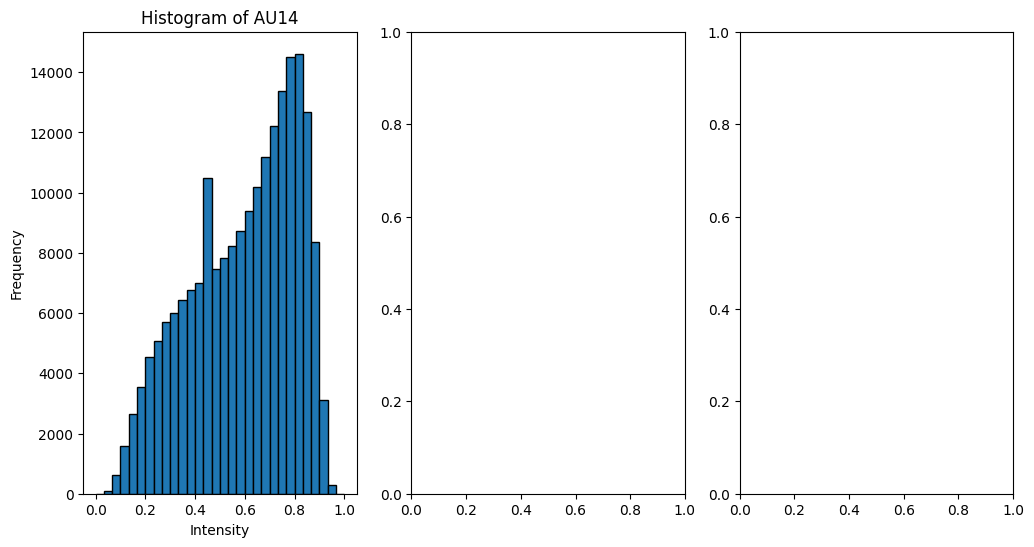

In [ ]:
def plotter_with_img(au, data, val=None):
    """Plots histogram of AU values
    and shows a sample image with that AU value.
    """
    data_au = data[au]

    hist, bins = np.histogram(data_au, bins=30, range=(0, 1))

    fig, ax = plt.subplots(1, 3, figsize=(12, 6))
    ax[0].bar(
        bins[:-1], hist, width=(bins[1] - bins[0]), align="edge", edgecolor="black"
    )
    ax[0].set_title(f"Histogram of {au}")
    ax[0].set_xlabel("Intensity")
    ax[0].set_ylabel("Frequency")

    # sample a random row, if val is given, use that value
    if val is None:
        sample_row = data.sample(n=1).iloc[0]
        col = "red"
        actual_val = sample_row[au]
    else:
        data["diff"] = (data[au] - val).abs()
        closest_10 = data.nsmallest(30, "diff")
        sample_row = closest_10.sample(n=1).iloc[0]
        data = data.drop(columns=["diff"])

        col = "yellow"
        actual_val = sample_row[au]
    img_path = "/home/ucloud/rsp/celeba_dataset/img_align_celeba/img_align_celeba/"
    curr_img = sample_row["input"].split("/")[-1]
    # plot image with bounding box
    img = cv2.imread(img_path + curr_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[1].imshow(img)
    ax[1].set_title(f"Sample Image with {au}={sample_row[au]}")
    ax[1].axis("off")

    # plot a line on the histogram with the value
    ax[0].axvline(
        x=actual_val, color=col, linestyle="--", label=f"Selected Value: {val}"
    )
    ax[0].legend()

    # in the third plot, show AU description
    description = AU_lookup[au]
    ax[2].axis("off")
    ax[2].text(
        0.1,
        0.8,
        f"Action Unit: {au}\n\nDescription: {description['Action Unit']}\n\nFacial Muscle: {description['Facial Muscle']}\n\nNotes: {description['Notes']}",
        fontsize=12,
    )

    plt.show()


plotter_with_img("AU14", data, val=0.3)

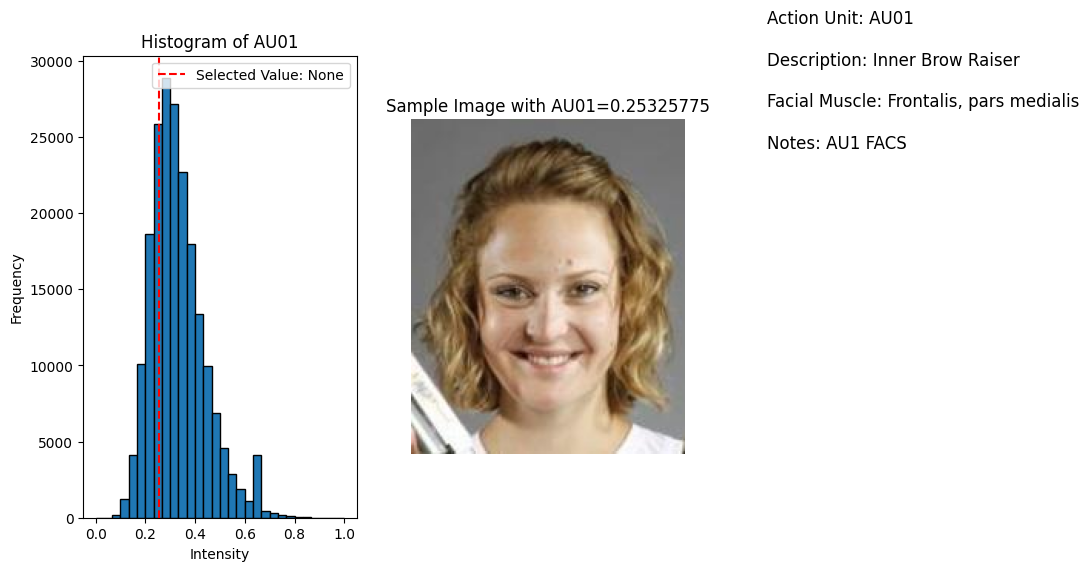

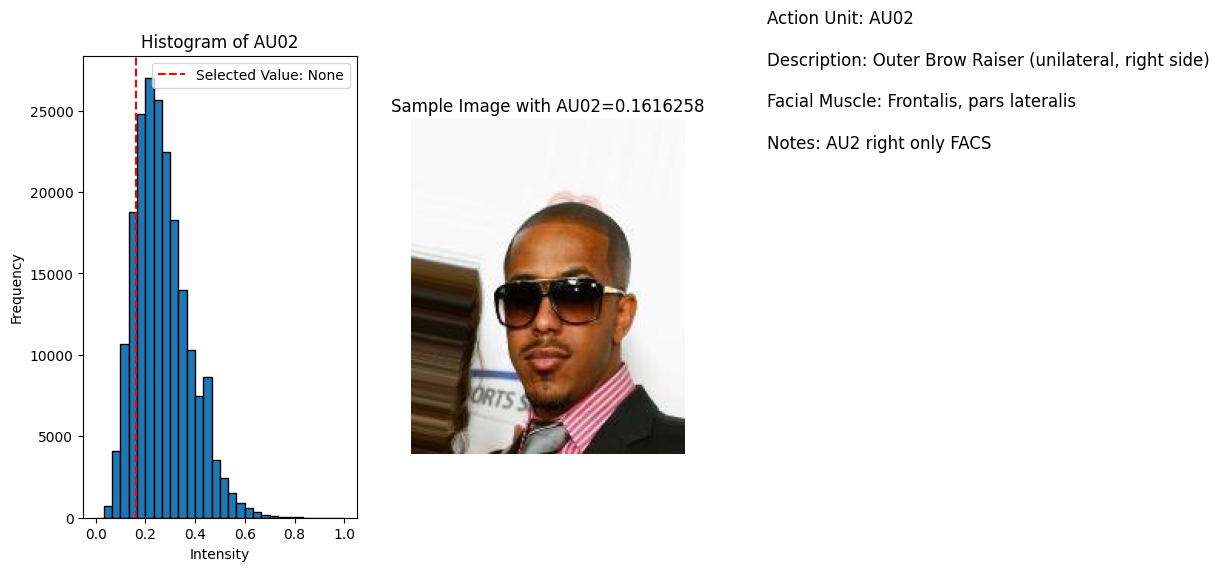

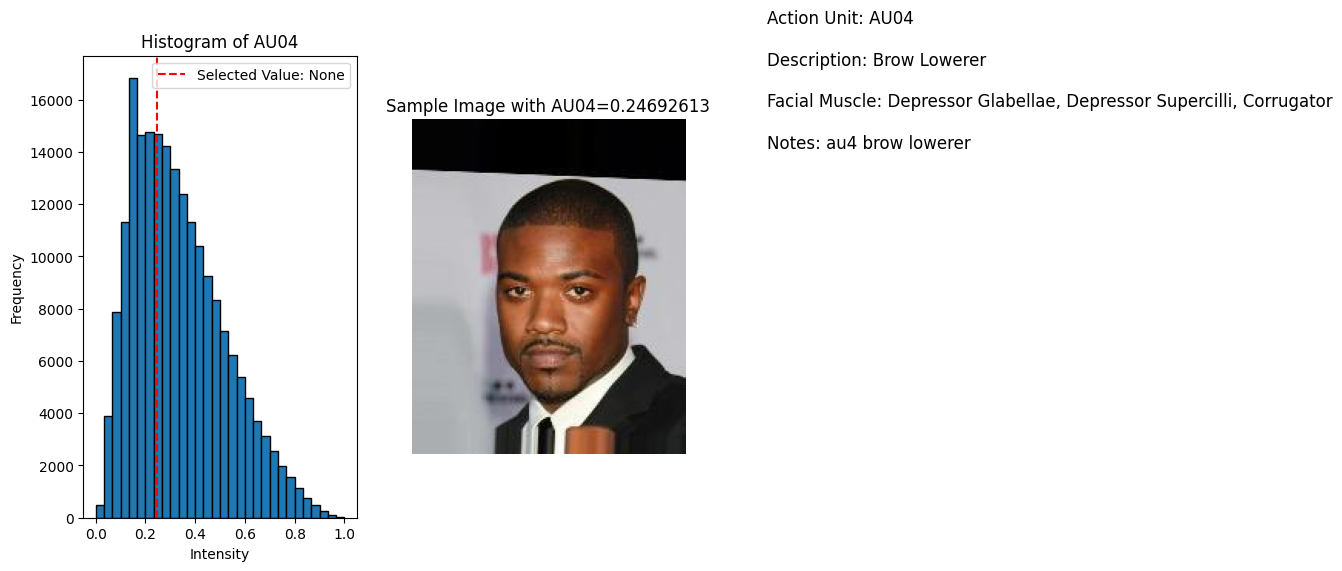

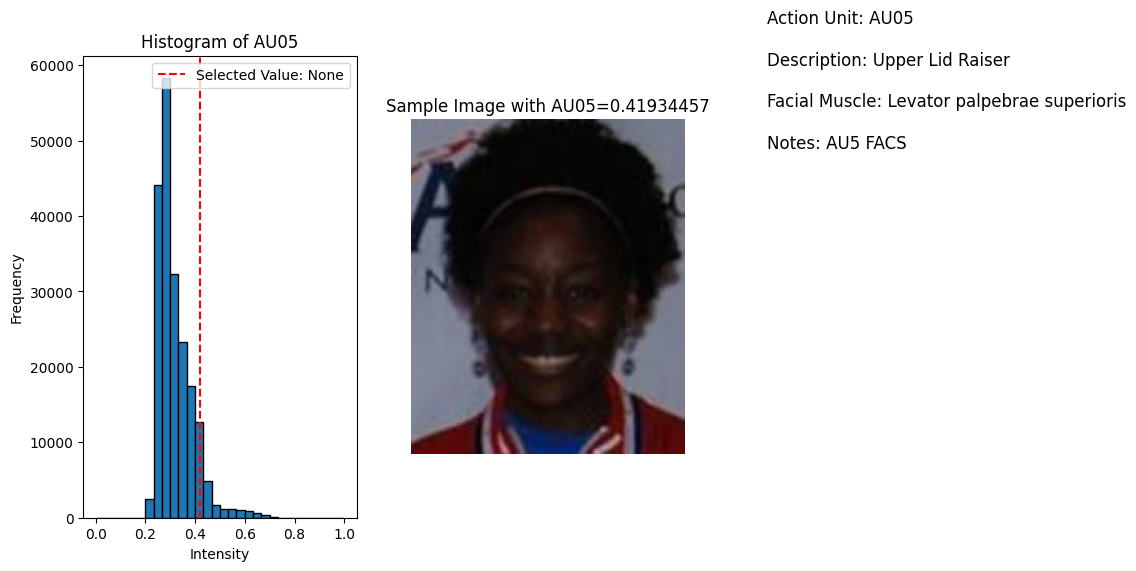

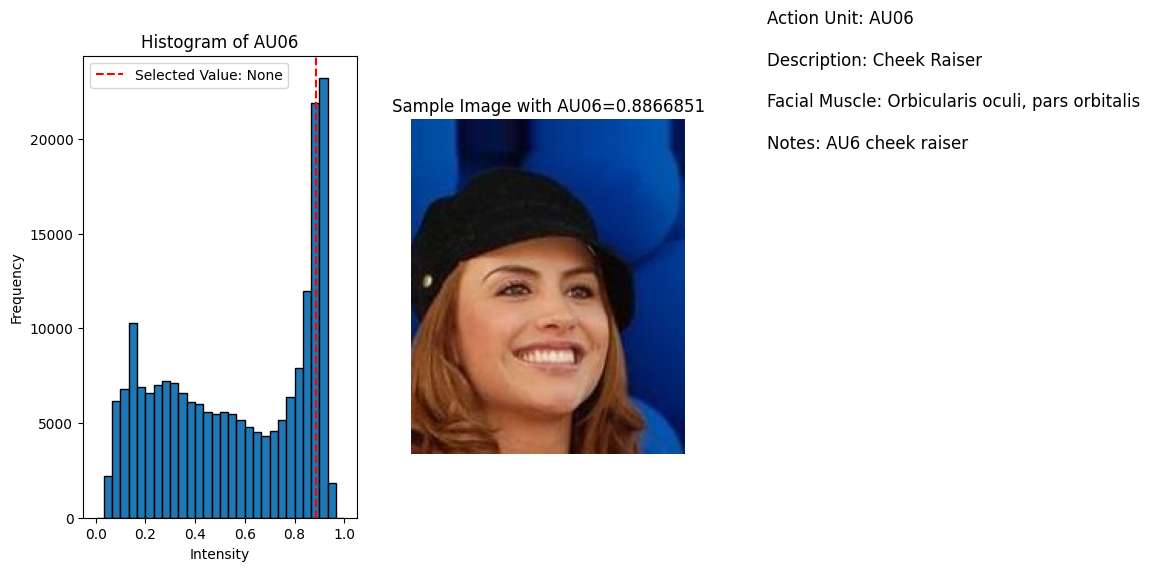

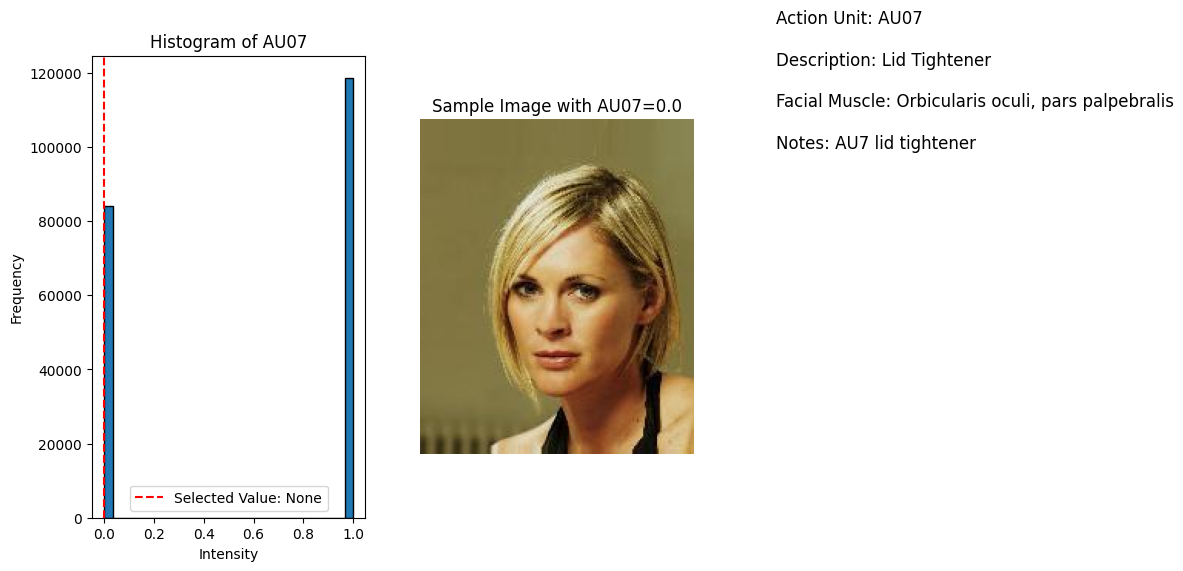

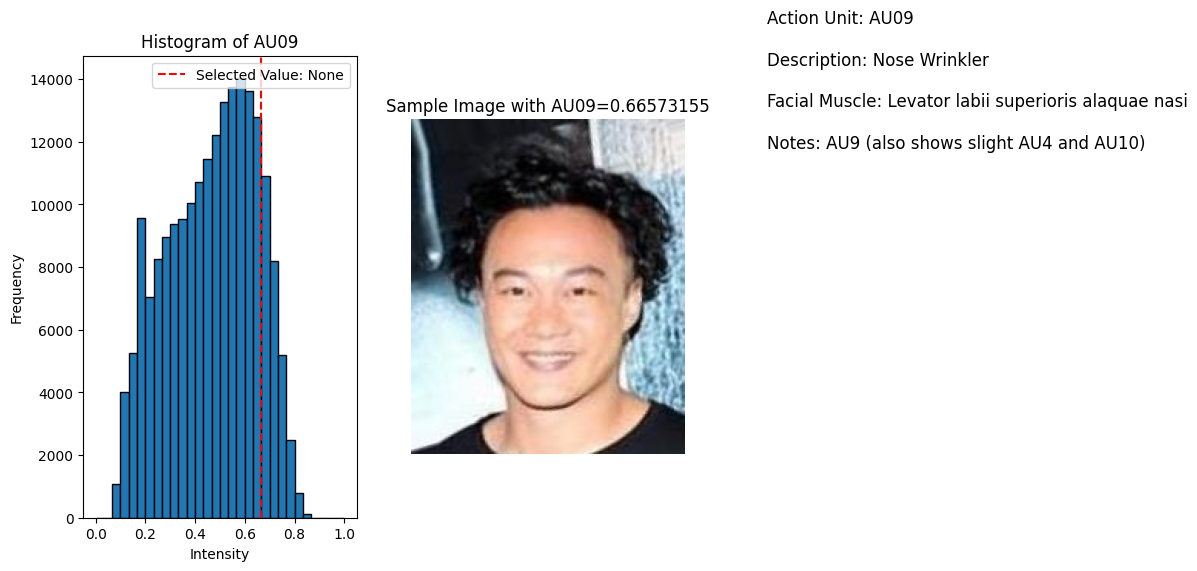

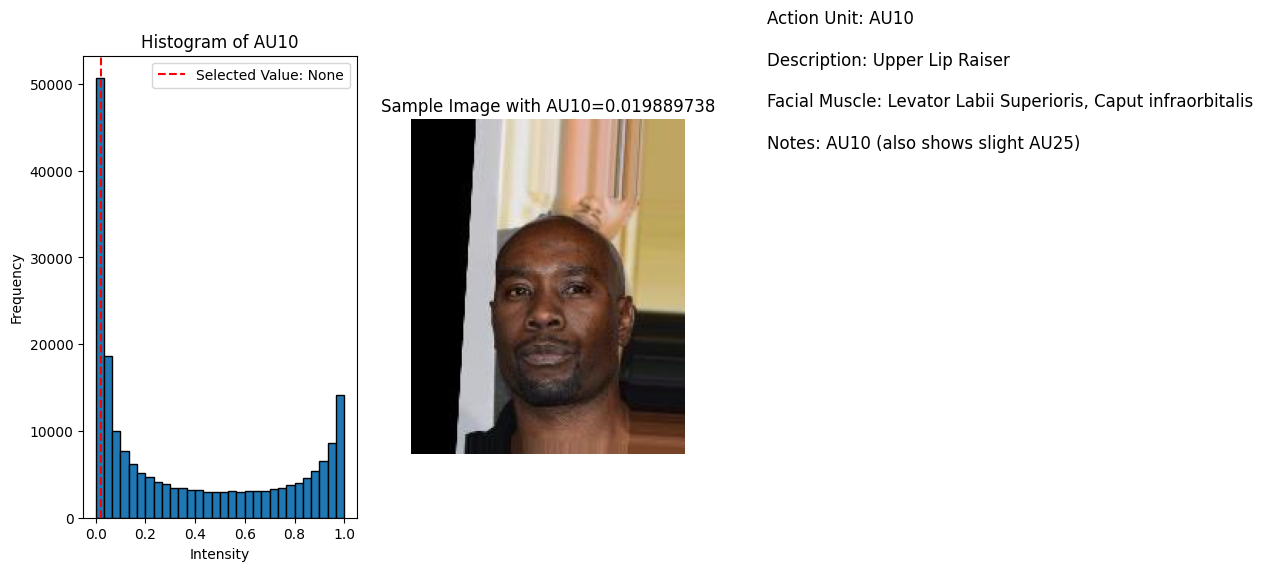

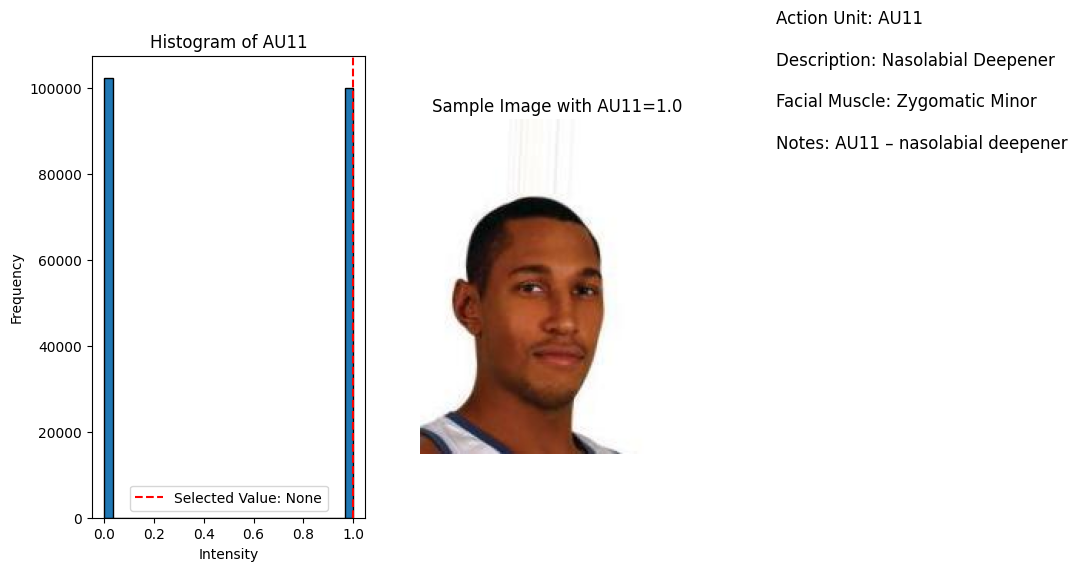

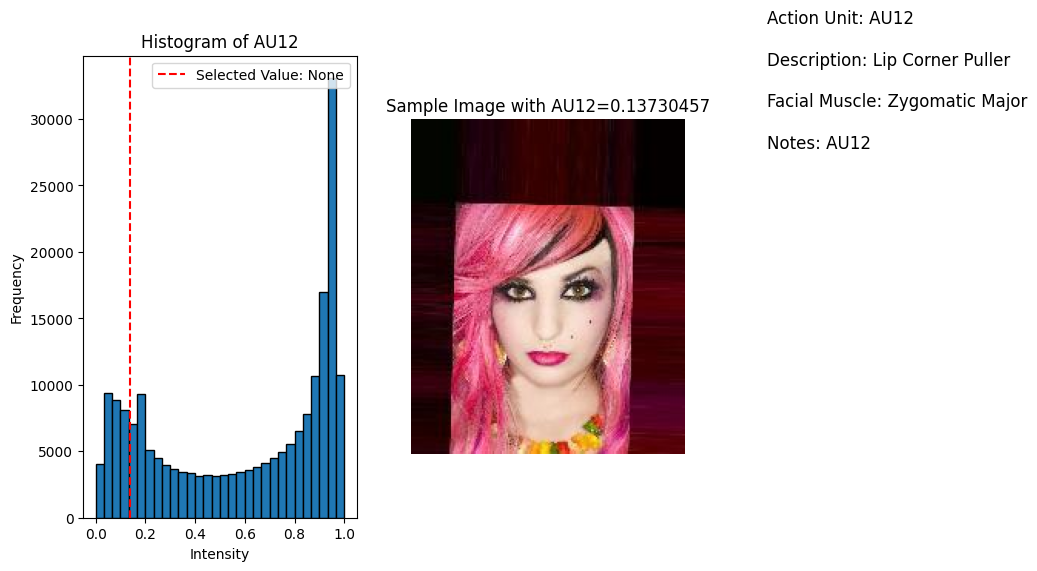

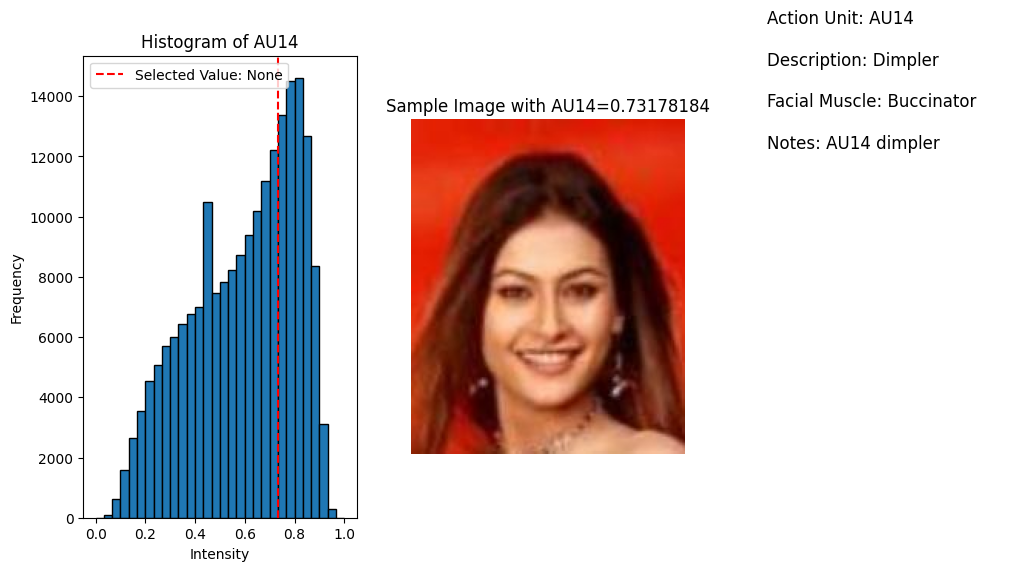

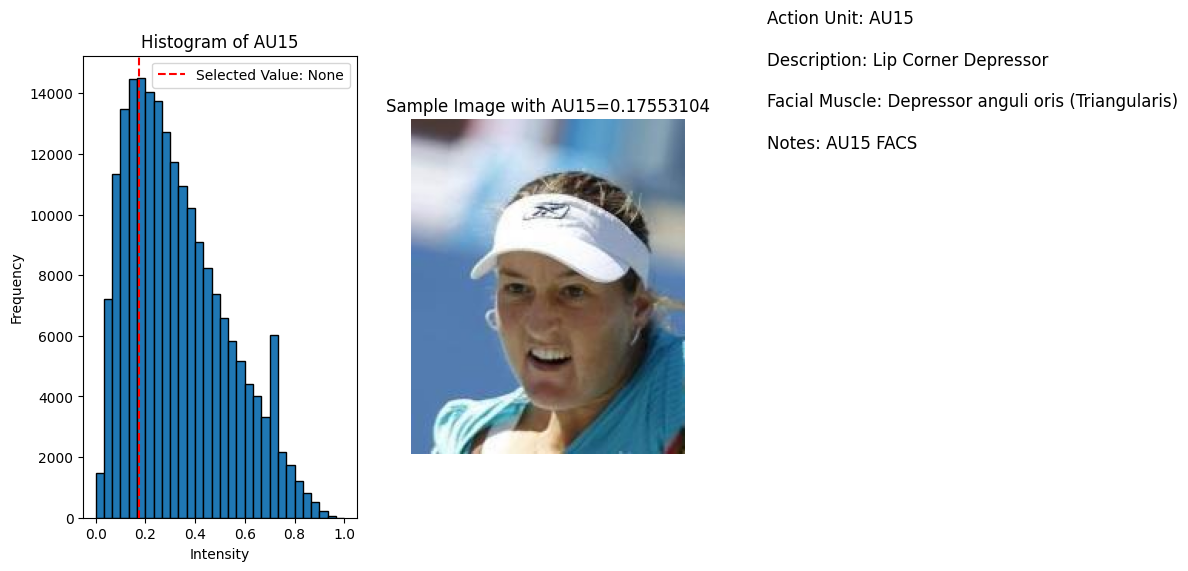

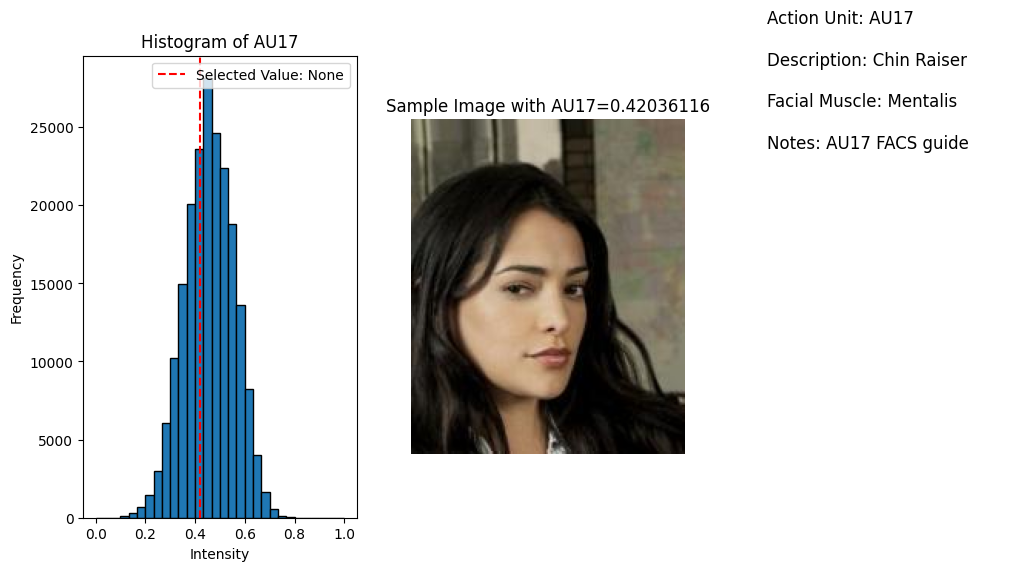

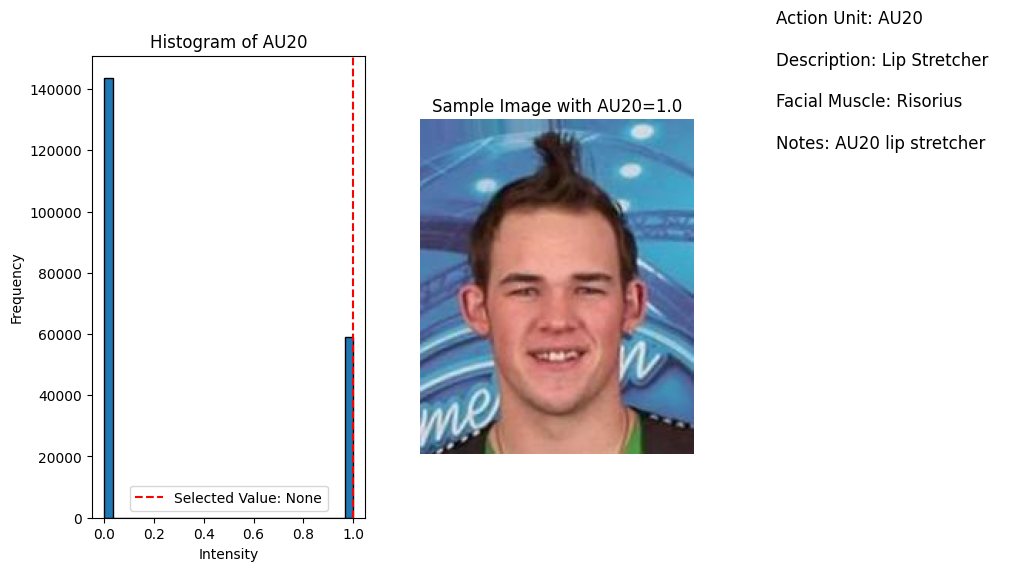

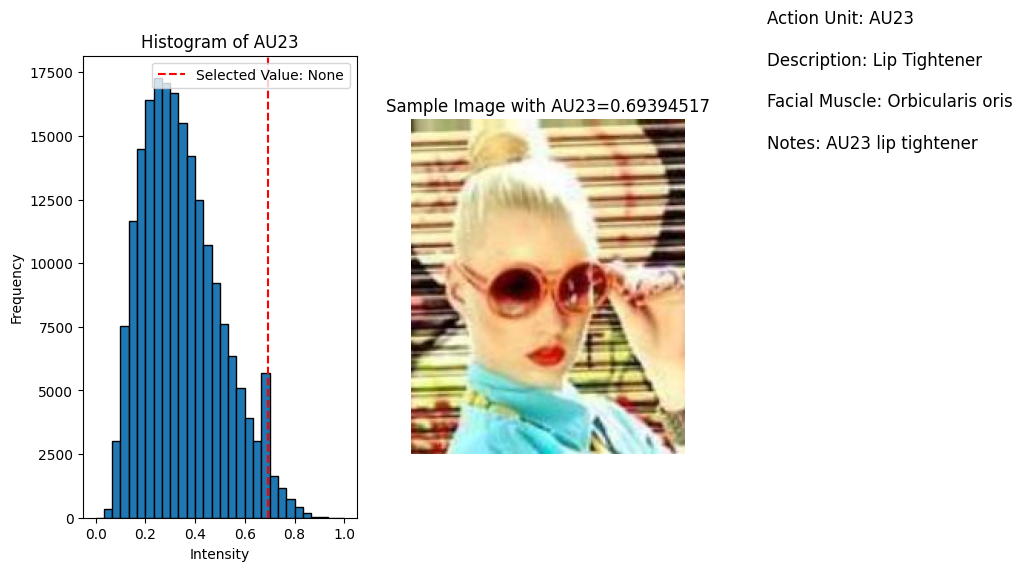

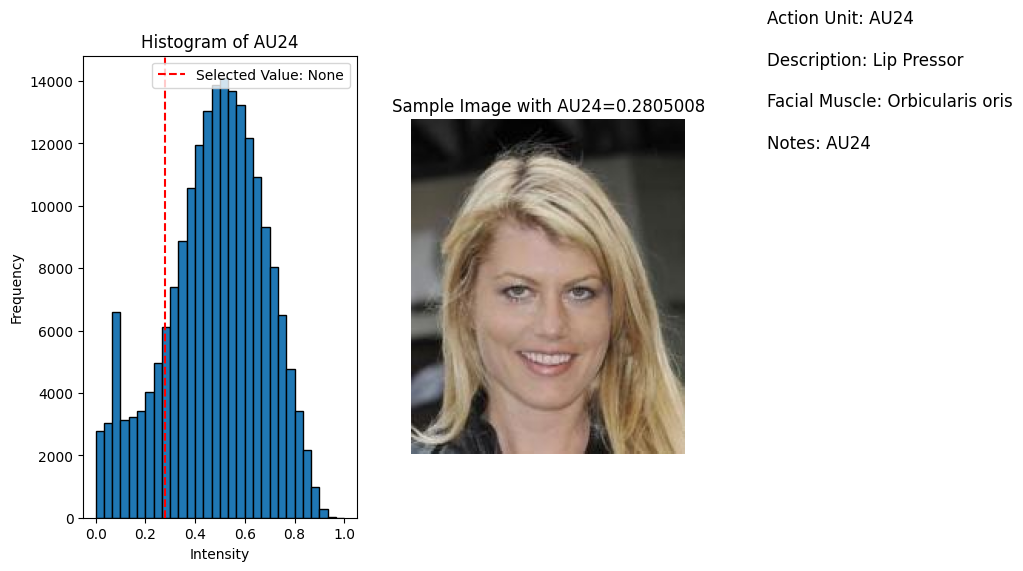

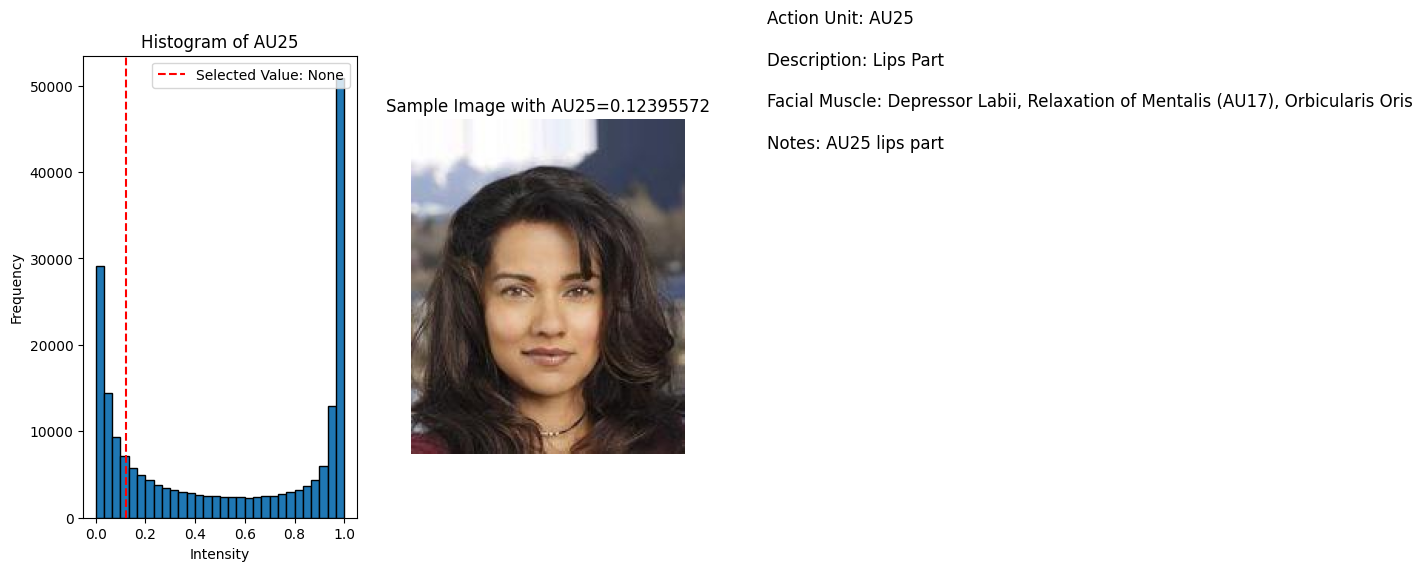

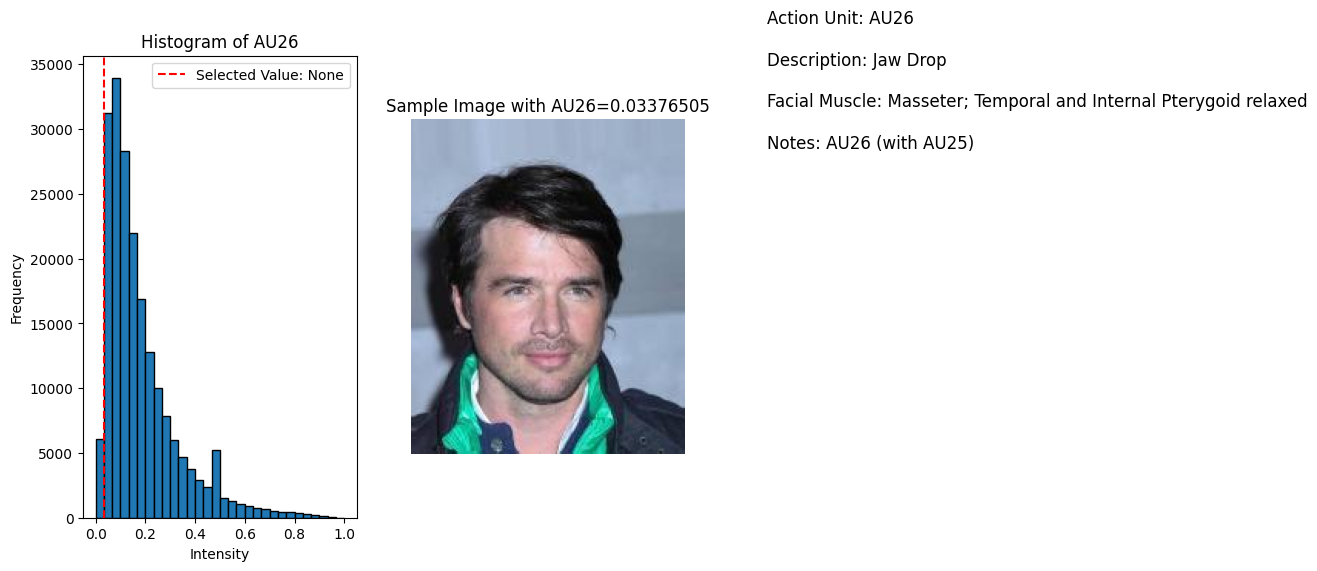

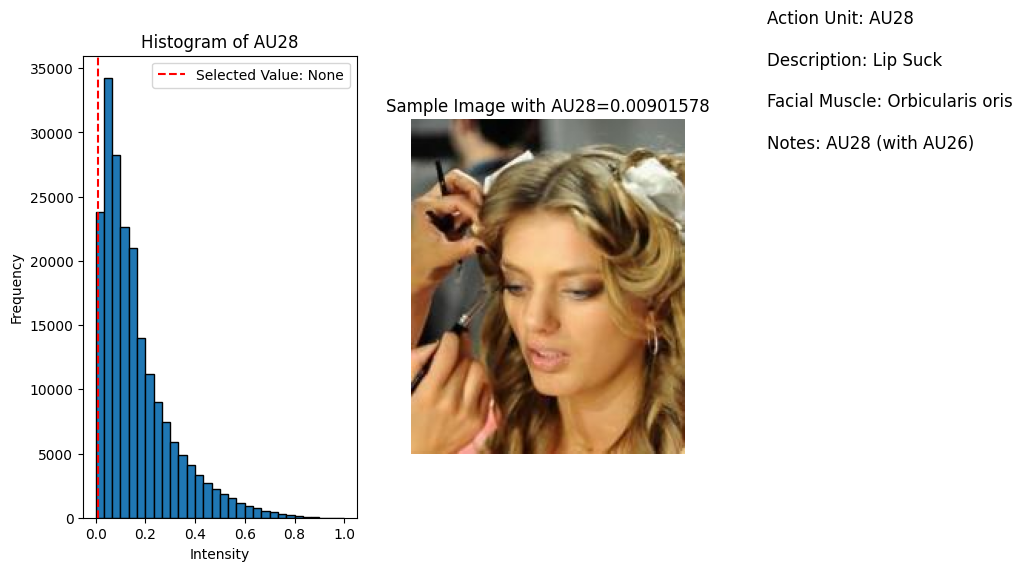

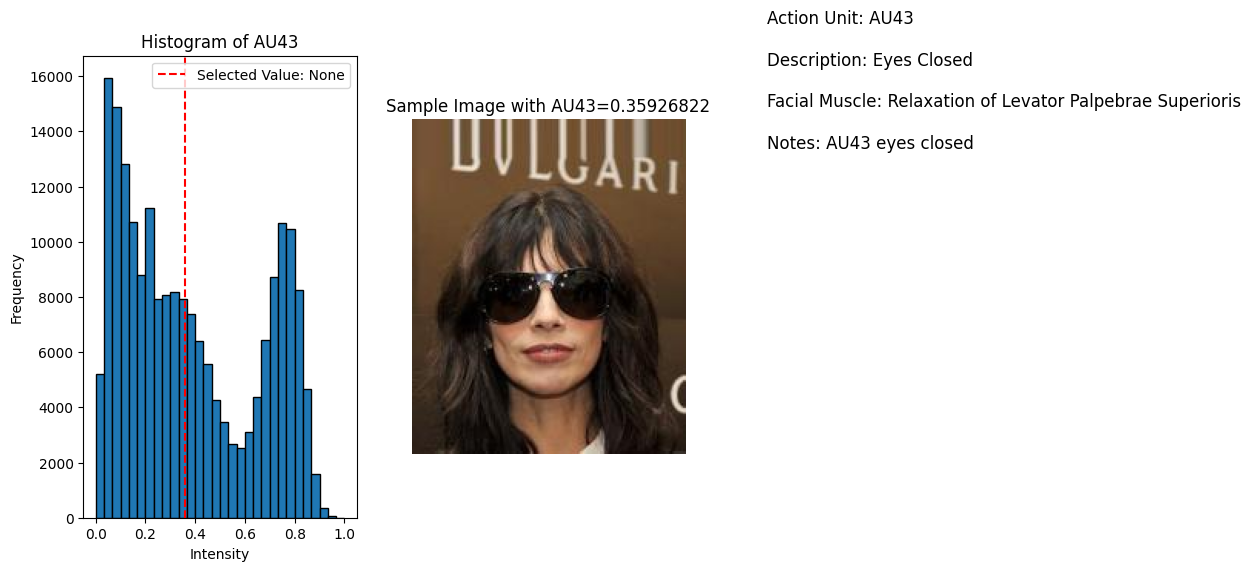

In [ ]:
for au in AU_s:
    plotter_with_img(au, data)